# Background

### Transaction Table

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)  
TransactionAMT: transaction payment amount in USD  
ProductCD: product code, the product for each transaction  
card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.  
addr: address  
dist: distance  
P_ and (R__) emaildomain: purchaser and recipient email domain  

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.  

D1-D15: timedelta, such as days between previous transaction, etc.  
M1-M9: match, such as names on card and address, etc.  
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.  
  
  
Categorical Features:
ProductCD  
card1 - card6  
addr1, addr2  
P_emaildomain  
R_emaildomain  
M1 - M9  

### Identity Table

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.  

They're collected by Vesta’s fraud protection system and digital security partners.  
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)  

Categorical Features:   
DeviceType  
DeviceInfo    
id_12 - id_38  

# Initialization

In [1]:
%matplotlib inline

import os
from pathlib import Path
import numpy as np
import datetime

import pandas as pd
pd.set_option("display.max_rows",10)

# IPython

from IPython.display import display, Markdown
from IPython.display import Image

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# http://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


# Autoload Python Code
%load_ext autoreload
%autoreload 2

In [2]:
def convert_transaction_dt_to_datetime(df, reference_date = '1/1/2018'):
    df['_transaction_timedelta'] = pd.to_timedelta(df['TransactionDT'], unit='seconds')
    df['_transaction_datetime'] = pd.to_datetime(reference_date) + df['_transaction_timedelta']
    
    return df

# Data

Information about the data can be found here. 

In [3]:
data_path = Path('/Users/bkraft/data/fraud/raw/')

list(data_path.glob('*.csv'))

[PosixPath('/Users/bkraft/data/fraud/raw/test_transaction.csv'),
 PosixPath('/Users/bkraft/data/fraud/raw/train_identity.csv'),
 PosixPath('/Users/bkraft/data/fraud/raw/test_identity.csv'),
 PosixPath('/Users/bkraft/data/fraud/raw/sample_submission.csv'),
 PosixPath('/Users/bkraft/data/fraud/raw/train_transaction.csv')]

In [227]:
df_train = pd.read_csv(data_path / 'train_transaction.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [231]:
column = sorted(df_train.columns)

column

['C1',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'D1',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'P_emaildomain',
 'ProductCD',
 'R_emaildomain',
 'TransactionAmt',
 'TransactionDT',
 'TransactionID',
 'V1',
 'V10',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V11',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V12',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V13',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V138',
 'V139',
 'V14',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V15',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V16',
 'V160',
 'V161

In [5]:
df_train = convert_transaction_dt_to_datetime(df_train)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 396 entries, TransactionID to _transaction_datetime
dtypes: datetime64[ns](1), float64(376), int64(4), object(14), timedelta64[ns](1)
memory usage: 1.7+ GB


# Simple Model

In [7]:
columns = ['isFraud',
           'TransactionID',
           'card1',
           'ProductCD',
 'TransactionDT',
 'TransactionAmt',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C7',
 'C6',
 'C13',
 'C12',
 'C14',
 'C10',
 'C9',
 'C8',
 'C11',
 'V310',
 'V304',
 'V309',
 'V308',
 'V306',
 'V305',
 'V307',
 'V295',
 'V299',
 'V298',
 'V297',
 'V294',
 'V303',
 'V292',
 'V302',
 'V293',
 'V279',
 'V291',
 'V312',
 'V287',
 'V286',
 'V284',
 'V280',
 'V316',
 'V285',
 'V318',
 'V319',
 'V320',
 'V321',
 'V311',
 'V290',
 'V317',
 'V117',
 'V135',
 'V96',
 'V133',
 'V132',
 'V131',
 'V130',
 'V129',
 'V128',
 'V119',
 'V125',
 'V124',
 'V123',
 'V122',
 'V121',
 'V120',
 'V136',
 'V127',
 'V137',
 'V126',
 'V118',
 'V95',
 'V116',
 'V114',
 'V134',
 'V107',
 'V113',
 'V112',
 'V111',
 'V109',
 'V108',
 'V106',
 'V110',
 'V104',
 'V98',
 'V115',
 'V97',
 'V99',
 'V105',
 'V101',
 'V102',
 'V103',
 'V100',
 'card6',
 'card3',
 'card4',
 'V282',
 'V283',
 'V296',
 'V301',
 'V300',
 'D1',
 'V288',
 'V313',
 'V315',
 'V281',
 'V289',
 'V314',
 'card5',
 'card2']

In [30]:
Xy_raw = df_train[columns]
Xy_notna = Xy_raw[Xy_raw.notna().all(axis=1)]

In [31]:
len(Xy_raw)
len(Xy_notna)

590540

578081

In [186]:
def one_hot_encoding(X, column, drop_column):
    
    X_concat =  (pd.get_dummies(X[column], prefix=column, drop_first=False)
                )
    
    X_concat.columns = [x.replace(' ', '_') for x in X_concat.columns] 
    
    X_concat = X_concat.drop(columns = drop_column, axis=1)

    return X_concat

In [189]:
Xy_notna.ProductCD.value_counts()

X_product_cd = one_hot_encoding(Xy_notna, 'ProductCD', 'ProductCD_S')


W    429301
C     67389
R     37152
H     32711
S     11528
Name: ProductCD, dtype: int64

In [196]:
for ii in ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']:
    display(Markdown(f'### {ii}'))
    Xy_notna[ii].value_counts().to_frame()


### card1

,card1
7919,14877
9500,14074
15885,10298
17188,10292
15066,7889
...,...
16556,1
9198,1
17747,1
16616,1


### card2

,card2
321.0,48806
111.0,45076
555.0,41624
490.0,37790
583.0,21761
...,...
153.0,38
557.0,37
328.0,34
473.0,18


### card3

,card3
150.0,511016
185.0,56136
106.0,1548
144.0,1229
146.0,1166
...,...
170.0,1
132.0,1
125.0,1
164.0,1


### card4

,card4
visa,377591
mastercard,187933
american express,8080
discover,4477


### card5

,card5
226.0,292444
224.0,81276
166.0,55346
102.0,27815
117.0,25852
...,...
201.0,1
196.0,1
204.0,1
125.0,1


### card6

,card6
debit,433999
credit,144049
debit or credit,30
charge card,3


In [216]:
import re

In [230]:
sorted(columns)

['C1',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'D1',
 'ProductCD',
 'TransactionAmt',
 'TransactionDT',
 'TransactionID',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V279',
 'V280',
 'V281',
 'V282',
 'V283',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 '

In [226]:
[x for x in sorted(Xy_raw.columns) if bool(re.match('^C', x))]
[x for x in sorted(Xy_raw.columns) if bool(re.match('^D', x))]
[x for x in sorted(Xy_raw.columns) if bool(re.match('^M', x))]

['C1',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9']

['D1']

[]

In [202]:
for ii in range(1,6):
    ii_column = f'M{ii}'
    display(Markdown(f'### {ii_column}'))
    Xy_raw[ii_column].value_counts().to_frame()


### M1

KeyError: 'M1'

In [187]:
X_card1 = one_hot_encoding(Xy_notna, 'card1', 'ProductCD_S')



,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_W
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
5,0,0,0,1
...,...,...,...,...
590534,1,0,0,0
590536,0,0,0,1
590537,0,0,0,1
590538,0,0,0,1


In [89]:
def one_hot_encoding(X, columns):
    
    X_product_cd = pd.get_dummies(X.ProductCD, prefix='ProductCD', drop_first=False)
    X_card4 =  pd.get_dummies(X.card4,prefix='card4', drop_first=False)
    X_card6 =  pd.get_dummies(X.card6,prefix='card6', drop_first=False)
    
    X_concat = (pd.concat([X,
                          X_product_cd, 
                          X_card4, 
                          X_card6], axis=1)
                .drop(columns=['ProductCD', 'ProductCD_S',
                                          'card4', 'card4_discover',
                                          'card6', 'card6_charge card' ], axis=1)
               )

    X_concat.columns = [x.replace(' ', '_') for x in X_concat.columns] 
    
    return X_concat

X_ohe = (one_hot_encoding(Xy_notna)
         .drop('isFraud', axis=1)
         .copy()
        )

y_ohe = y_res.copy()

In [77]:
ohe_columns = list(X_ohe.drop('isFraud', axis=1).columns)

# Undersample Data Set

In [10]:
from imblearn.under_sampling import RandomUnderSampler

In [44]:
rus = RandomUnderSampler(sampling_strategy='not minority')

In [45]:
X = X_ohe.drop('isFraud', axis=1).copy()
y = Xy_notna['isFraud'].copy()

X_res, y_res = rus.fit_resample(X, y)

In [46]:
len(X_res)
len(y_res)

40032

40032

# XGBoost

In [47]:
from xgboost import XGBClassifier, DMatrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Prepare data for XGBoost

In [50]:
seed = 4257
test_size = 0.33

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=test_size, random_state=seed)

### Create XGBoost Classifier

In [51]:
model = XGBClassifier()

### Cross Validation with Accuracy

In [54]:
from sklearn.model_selection import cross_val_score

In [60]:
scores = cross_val_score(model, X_train, y_train, 
                         cv=10)

scores

scores.min()
scores.max()
scores.mean()
scores.std()

array([0.84383153, 0.84228188, 0.85831469, 0.85719612, 0.83668904,
       0.83967189, 0.84228188, 0.84265474, 0.85085757, 0.83706189])

0.8366890380313199

0.8583146905294556

0.8450841226125329

0.007364666203241593

### Cross Validation with Specificity

In [56]:
from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

In [57]:
specificity_scorer = make_scorer(specificity_score)

In [61]:
scores = cross_val_score(model, X_train, y_train, 
                         cv=10, 
                         scoring=specificity_scorer)

scores.min()
scores.max()
scores.mean()
scores.std()

0.8639760837070254

0.8856502242152466

0.873626549049946

0.00652378662670043

### Train Model

In [149]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
# make predictions for test data
y_pred = model.predict_proba(X_test)

In [151]:
specificity_score(y_test, y_pred)

0.8786737000753579

### ROC

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [174]:
y_test

24234    1
9818     0
18539    0
38591    1
1164     0
        ..
24359    1
3653     0
6173     0
27511    1
30937    1
Name: isFraud, Length: 13211, dtype: int64

In [175]:
y_pred

array([[0.14939523, 0.8506048 ],
       [0.85640144, 0.14359853],
       [0.94438   , 0.05562   ],
       ...,
       [0.8202308 , 0.17976923],
       [0.21985054, 0.78014946],
       [0.2284981 , 0.7715019 ]], dtype=float32)

In [176]:
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_pred)
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [168]:
import matplotlib.pyplot as plt

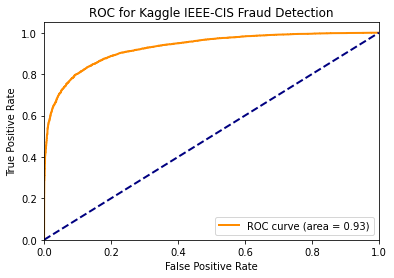

In [181]:
plt.figure()

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Kaggle IEEE-CIS Fraud Detection')
plt.legend(loc="lower right")

plt.show();

# Apply Model to Test Data

In [65]:
df_test = pd.read_csv(data_path / 'test_transaction.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.5+ GB


In [78]:
Xy_test_raw = df_test[set(columns) - {'isFraud'}]

In [81]:
Xy_test_raw.card4.value_counts()
Xy_test_raw.card6.value_counts()

visa                334882
mastercard          158169
american express      7681
discover              2873
Name: card4, dtype: int64

debit          385021
credit         118662
charge card         1
Name: card6, dtype: int64

In [90]:
X_test_ohe = one_hot_encoding(Xy_test_raw).copy()
X_test_ohe['card6_debit_or_credit'] = 0

X_test_ohe = X_test_ohe[ohe_columns]

In [124]:
# make predictions for test data
y_pred = model.predict_proba(X_test_ohe)[:,1]

In [146]:
def create_dataframe_for_submission(model, X_test_ohe):
    
    y_pred = model.predict_proba(X_test_ohe)[:,1]
    
    submission = (pd.concat([X_test_ohe['TransactionID'], pd.Series(y_pred)], axis=1)
              .set_index('TransactionID')
             )
    
    submission.columns = ['isFraud']
    
    return submission
    

In [147]:
submission = create_dataframe_for_submission(model, X_test_ohe)
submission

,isFraud
TransactionID,
3663549,0.052741
3663550,0.059743
3663551,0.073539
3663552,0.161364
3663553,0.068326
...,...
4170235,0.291623
4170236,0.078848
4170237,0.253482


### Write Submission

In [148]:
def write_submission(submission, filename):
    submission.to_csv(filename, index=True, header=True)

In [140]:
df_public = pd.read_csv('~/Downloads/ieee-fraud-detection-publicleaderboard.csv')

In [142]:
df_public[df_public['TeamName'].str.contains('Bob')]

,TeamId,TeamName,SubmissionDate,Score
15097,3472349,Bob Suzuki,2019-08-29 18:53:14,0.939728
27074,3413804,XLCBobby,2019-09-24 01:45:50,0.953003
30813,3413804,XLCBobby,2019-09-30 05:28:36,0.953377
